# Stochastic modeling in Catalyst
## Repressilator SDE

In [1]:
using Catalyst
using ModelingToolkit
using StochasticDiffEq
using JumpProcesses
using Plots

Model is the same as building the ODE problem

In [2]:
repressilator = @reaction_network begin
    hillr(P₃, α, K, n), ∅ --> m₁
    hillr(P₁, α, K, n), ∅ --> m₂
    hillr(P₂, α, K, n), ∅ --> m₃
    (δ, γ), m₁ ↔ ∅
    (δ, γ), m₂ ↔ ∅
    (δ, γ), m₃ ↔ ∅
    β, m₁ --> m₁ + P₁
    β, m₂ --> m₂ + P₂
    β, m₃ --> m₃ + P₃
    μ, P₁ --> ∅
    μ, P₂ --> ∅
    μ, P₃ --> ∅
end

@unpack m₁, m₂, m₃, P₁, P₂, P₃, α, K, n, δ, γ, β, μ = repressilator
p = [α => 0.5, K => 40, n => 2, δ => log(2) / 120, γ => 5e-3, β => 20 * log(2) / 120, μ => log(2) / 60]
u₀ = [m₁ => 0.0, m₂ => 0.0, m₃ => 0.0, P₁ => 20.0, P₂ => 0.0, P₃ => 0.0]

6-element Vector{Pair{Symbolics.Num, Float64}}:
 m₁(t) => 0.0
 m₂(t) => 0.0
 m₃(t) => 0.0
 P₁(t) => 20.0
 P₂(t) => 0.0
 P₃(t) => 0.0

Convert the very same reaction network to Chemical Langevin Equation (CLE), adding Brownian motion terms to the state variables.
Build an `SDEProblem` with the reaction network

┌ Warning: dt(1.8189894035458565e-12) <= dtmin(1.8189894035458565e-12) at t=7373.709656466239, and step error estimate = 2.245992334997671. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase ~/.julia/packages/SciMLBase/DbVzk/src/integrator_interface.jl:612


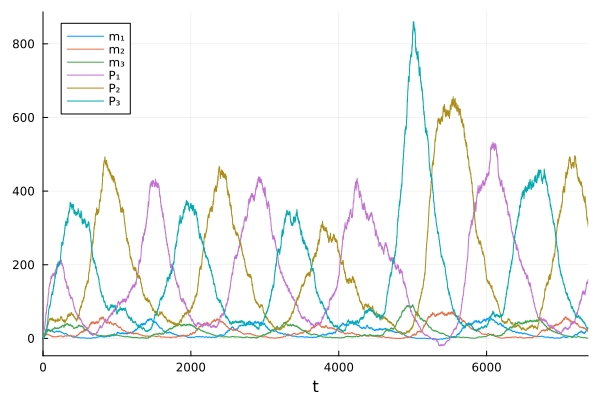

In [3]:
tspan = (0.0, 10000.0)
sprob = SDEProblem(repressilator, u₀, tspan, p);
sol = solve(sprob, LambaEulerHeun())
plot(sol)

## Using Gillespie's stochastic simulation algorithm (SSA)
Create a Gillespie stochastic simulation model with the same reaction network. The initial conditions should be integers.

In [4]:
u0 = [m₁ => 0, m₂ => 0, m₃ => 0, P₁ => 20, P₂ => 0, P₃ => 0]

6-element Vector{Pair{Symbolics.Num, Int64}}:
 m₁(t) => 0
 m₂(t) => 0
 m₃(t) => 0
 P₁(t) => 20
 P₂(t) => 0
 P₃(t) => 0

Create a `JumpProblem`

In [5]:
jprob = JumpInputs(repressilator, u0, tspan, p) |> JumpProblem

JumpProblem with problem DiscreteProblem with aggregator JumpProcesses.Direct
Number of jumps with discrete aggregation: 3
Number of jumps with continuous aggregation: 0
Number of mass action jumps: 12


Solve and visualize the problem.

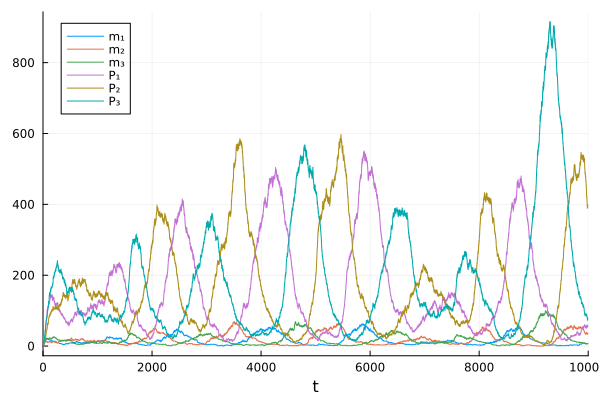

In [6]:
sol = solve(jprob, SSAStepper(), saveat=10.0)
plot(sol)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*